In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import omegaconf
from shell.utils.experiment_utils import *
from shell.fleet.utils.fleet_utils import *
from shell.utils.metric import *
import matplotlib.pyplot as plt
from shell.fleet.network import TopologyGenerator
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from shell.fleet.fleet import Agent, Fleet
from shell.fleet.data.data_utilize import *
from shell.fleet.data.recv import *

from sklearn.manifold import TSNE
from torchvision.utils import make_grid
from shell.fleet.data.data_utilize import *
import logging
from sklearn.metrics import f1_score
import os
from shell.fleet.data.recv_utils import *
from tqdm import tqdm
import argparse
from functools import partial
from torchvision.utils import make_grid
from shell.utils.oodloss import OODSeparationLoss
from pythresh.thresholds.dsn import DSN
from pythresh.thresholds.aucp import AUCP
from pythresh.thresholds.boot import BOOT
from pythresh.thresholds.zscore import ZSCORE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict

logging.basicConfig(level=logging.INFO)

In [3]:
dataset = "mnist"
algo = "modular"

experiment_folder = "experiment_results"
experiment_name = "jorge_setting_lowest_task_id_wins_modmod_test_sync_base_True_opt_with_random_False_frozen_False_transfer_decoder_True_transfer_structure_True_no_sparse_basis_True"

use_contrastive = True
num_trains_per_class = 64
seed = 0
num_tasks = 10
parallel = False
comm_freq = 2 

ranker = 'instance'
# ranker = 'label'

# module_select = 'tryout'
module_select = 'trust_sim'

save_dir = get_save_dir(experiment_folder, experiment_name,
                        dataset, algo, num_trains_per_class, use_contrastive, seed)


In [4]:
def modify_cfg(net_cfg, agent_cfg, train_cfg, fleet_additional_cfg, cfg):
    cfg.sharing_strategy['ranker'] = ranker
    cfg.sharing_strategy['module_select'] = module_select
    return net_cfg, agent_cfg, train_cfg, fleet_additional_cfg, cfg

In [5]:
fleet = setup_fleet(save_dir, task_id=4, parallel=False,
                    modify_cfg=modify_cfg)

INFO:root:Class sequence: [5 0 4 3 4 6 4 3 8 0 1 0 5 9 6 4 9 0 3 0]
INFO:root:task 0 :(128, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28)


{'train': {'component_update_freq': 100, 'num_epochs': 100, 'init_component_update_freq': 100, 'init_num_epochs': 100, 'save_freq': 10}, 'dataset': {'dataset_name': 'mnist', 'num_tasks': 10, 'num_classes_per_task': 2, 'with_replacement': True, 'num_trains_per_class': 64, 'num_vals_per_class': 50, 'remap_labels': True}, 'net': {'name': 'mlp', 'depth': 4, 'layer_size': 64, 'dropout': 0.5, 'no_sparse_basis': True}, 'sharing_strategy': {'name': 'modmod', 'num_coms_per_round': 2, 'module_selection': 'gt_most_similar', 'pre_or_post_comm': 'pre', 'opt_with_random': False, 'comm_freq': 100, 'sync_base': True, 'freeze_candidate_module': False, 'transfer_decoder': True, 'transfer_structure': True}, 'seed': 0, 'algo': 'modular', 'job_name': 'mnist_modular_numtrain_64_contrastive', 'num_agents': 8, 'root_save_dir': 'experiment_results/jorge_setting_lowest_task_id_wins_modmod_test_sync_base_True_opt_with_random_False_frozen_False_transfer_decoder_True_transfer_structure_True_no_sparse_basis_True', 

INFO:root:task 5 :(128, 1, 28, 28)
INFO:root:task 6 :(128, 1, 28, 28)
INFO:root:task 7 :(128, 1, 28, 28)
INFO:root:task 8 :(128, 1, 28, 28)
INFO:root:task 9 :(128, 1, 28, 28)
INFO:root:Class sequence: [4 7 5 7 6 0 3 0 5 0 3 6 2 7 6 7 6 1 0 5]
INFO:root:task 0 :(128, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28)
INFO:root:task 5 :(128, 1, 28, 28)
INFO:root:task 6 :(128, 1, 28, 28)
INFO:root:task 7 :(128, 1, 28, 28)
INFO:root:task 8 :(128, 1, 28, 28)
INFO:root:task 9 :(128, 1, 28, 28)
INFO:root:Class sequence: [6 7 7 8 4 1 1 8 6 1 6 4 5 7 8 0 2 3 0 3]
INFO:root:task 0 :(128, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28)
INFO:root:task 5 :(128, 1, 28, 28)
INFO:root:task 6 :(128, 1, 28, 28)
INFO:root:task 7 :(128, 1, 28, 28)
INFO:root:task 8 :(128, 1, 28, 28)
INFO:root:task 9 :(128, 

i_size 28
num_classes 2
net_cfg {'name': 'mlp', 'depth': 4, 'layer_size': 64, 'dropout': 0.5, 'no_sparse_basis': True, 'i_size': 28, 'num_classes': 2, 'num_tasks': 10, 'num_init_tasks': 4, 'use_contrastive': True}
<class 'shell.learners.er_dynamic.CompositionalDynamicER'>


INFO:root:task 6 :(128, 1, 28, 28)
INFO:root:task 7 :(128, 1, 28, 28)
INFO:root:task 8 :(128, 1, 28, 28)
INFO:root:task 9 :(128, 1, 28, 28)
INFO:root:Agent: node_id: 69420, seed: 69420000
INFO:root:Agent: node_id: 0, seed: 0
INFO:root:Agent: node_id: 1, seed: 1000
INFO:root:Agent: node_id: 2, seed: 2000
INFO:root:Agent: node_id: 3, seed: 3000
INFO:root:Agent: node_id: 4, seed: 4000
INFO:root:Agent: node_id: 5, seed: 5000
INFO:root:Agent: node_id: 6, seed: 6000
INFO:root:Agent: node_id: 7, seed: 7000
INFO:root:Created fleet with 8 agents
INFO:root:Adding neighbors...
INFO:root:Fleet initialized


Setting seed 69420000
Setting seed 0
Setting seed 1000
Setting seed 2000
Setting seed 3000
Setting seed 4000
Setting seed 5000
Setting seed 6000
Setting seed 7000


In [6]:
fleet.change_save_dir('task_similarity_engineering_experiment_results')

In [7]:
fleet.agents[0].dataset.class_sequence

array([7, 0, 8, 4, 8, 3, 3, 9, 8, 0, 1, 0, 5, 9, 6, 4, 9, 0, 3, 0])

In [8]:
fleet.agents[1].dataset.class_sequence

array([7, 0, 8, 4, 8, 3, 3, 9, 5, 0, 3, 6, 2, 7, 6, 7, 6, 1, 0, 5])

In [9]:
fleet.communicate(task_id=5, end_epoch=None, comm_freq=None, num_epochs=None)

task_sims 0 1 5 > [-0.6718870381342853, -0.6762895955053034, -0.633106868990878, -0.6265780318951899, -0.6927010455644821]
AFTER PROCESSED: task_sims 0 1 5 > [-inf, -inf, -inf, -inf, -0.6927010455644821]
task_sims 0 2 5 > [-0.6331323214579907, -0.6172710630607389, -0.680478190229328, -0.6797890897346358, -0.6735570649098053]
AFTER PROCESSED: task_sims 0 2 5 > [-inf, -inf, -inf, -inf, -0.6735570649098053]
task_sims 0 3 5 > [-0.6643145814871965, -0.6540130610323736, -0.6586966693963803, -0.552381995273964, -0.6781199966025253]
AFTER PROCESSED: task_sims 0 3 5 > [-inf, -inf, -inf, -inf, -0.6781199966025253]
task_sims 0 4 5 > [-0.5882359702609978, -0.6872580075282, -0.6691748881958557, -0.6894740514326123, -0.6845629406965809]
AFTER PROCESSED: task_sims 0 4 5 > [-inf, -inf, -inf, -inf, -0.6845629406965809]
task_sims 0 5 5 > [-0.667767292849765, -0.6881809586843504, -0.6849864080633962, -0.6798297603034873, -0.6894532714293865]
AFTER PROCESSED: task_sims 0 5 5 > [-inf, -inf, -inf, -inf, -0.

In [10]:
node = fleet.agents[0]
node.modmod_record.df

,task_id,source_task_id,task_sim,module_id,neighbor_id
0,5,4,0.333333,4,1
1,6,4,0.333333,4,1
2,7,4,1.000000,4,6
3,8,4,0.333333,4,1
4,9,4,0.333333,4,1
0,5,4,-0.579942,4,4


In [11]:
node.incoming_modules

{1: [{'source_task_id': 4,
   'task_sim': -0.6034522980633152,
   'module_id': 4,
   'module': Linear(in_features=64, out_features=64, bias=True),
   'decoder': Linear(in_features=64, out_features=2, bias=True),
   'structure': Parameter containing:
   tensor([[1.3494, 0.5704, 0.6945, 1.1386],
           [0.5231, 1.5190, 1.4145, 1.1459],
           [0.5226, 0.5402, 0.6877, 0.9180],
           [0.5133, 0.5949, 1.4957, 0.6256],
           [1.2874, 1.1789, 0.9691, 1.1171]], device='cuda:0', requires_grad=True),
   'source_class_labels': array([5, 0])}],
 2: [{'source_task_id': 4,
   'task_sim': -0.6133493797922024,
   'module_id': 4,
   'module': Linear(in_features=64, out_features=64, bias=True),
   'decoder': Linear(in_features=64, out_features=2, bias=True),
   'structure': Parameter containing:
   tensor([[1.0574, 0.8505, 0.7268, 1.3959],
           [0.7540, 1.4359, 1.3804, 0.8452],
           [0.6252, 0.6461, 0.7722, 0.7495],
           [0.6594, 0.7408, 1.3501, 0.6804],
           [1

In [12]:
task_sims = [-0.6105588176717575, -0.6862172730042327, -0.693143989000467, -0.6848385105159178, -0.6034522980633152]

most_similar_task = max(
            range(len(task_sims)), key=lambda x: (task_sims[x], -x))
most_similar_task

4

In [13]:
fleet.agents[1].outgoing_modules

{0: [{'source_task_id': 4,
   'task_sim': -0.6034522980633152,
   'module_id': 4,
   'module': Linear(in_features=64, out_features=64, bias=True),
   'decoder': Linear(in_features=64, out_features=2, bias=True),
   'structure': Parameter containing:
   tensor([[1.3494, 0.5704, 0.6945, 1.1386],
           [0.5231, 1.5190, 1.4145, 1.1459],
           [0.5226, 0.5402, 0.6877, 0.9180],
           [0.5133, 0.5949, 1.4957, 0.6256],
           [1.2874, 1.1789, 0.9691, 1.1171]], device='cuda:0', requires_grad=True),
   'source_class_labels': array([5, 0])}],
 2: [{'source_task_id': 4,
   'task_sim': -0.6855232491291746,
   'module_id': 4,
   'module': Linear(in_features=64, out_features=64, bias=True),
   'decoder': Linear(in_features=64, out_features=2, bias=True),
   'structure': Parameter containing:
   tensor([[1.3494, 0.5704, 0.6945, 1.1386],
           [0.5231, 1.5190, 1.4145, 1.1459],
           [0.5226, 0.5402, 0.6877, 0.9180],
           [0.5133, 0.5949, 1.4957, 0.6256],
           [1

In [14]:
len(node.dataset.valset[0])

100

tensor([-0.0312, -0.0695, -0.2119, -0.2356, -0.2380, -0.2482, -0.2645, -0.2860,
        -0.3036, -0.3337, -0.3376, -0.3731, -0.3756, -0.3758, -0.3944, -0.3949,
        -0.4011, -0.4054, -0.4397, -0.4456, -0.4475, -0.4851, -0.4867, -0.4940,
        -0.4984, -0.5088, -0.5472, -0.5523, -0.5537, -0.5874, -0.6015, -0.6551,
        -0.7023, -0.7144, -0.7216, -0.7236, -0.7417, -0.7637, -0.7896, -0.7983])
tensor([-0.0146, -0.0321, -0.0436, -0.0837, -0.0922, -0.1544, -0.1590, -0.2384,
        -0.2605, -0.2637, -0.2660, -0.2673, -0.3127, -0.3262, -0.4088, -0.4239,
        -0.4253, -0.4346, -0.4749, -0.4806, -0.4868, -0.5210, -0.5323, -0.5472,
        -0.5544, -0.5822, -0.5926, -0.6062, -0.6082, -0.6199, -0.6325, -0.6341,
        -0.6850, -0.7176, -0.7362, -0.7649, -0.8098, -0.8220, -0.8523, -0.8636])


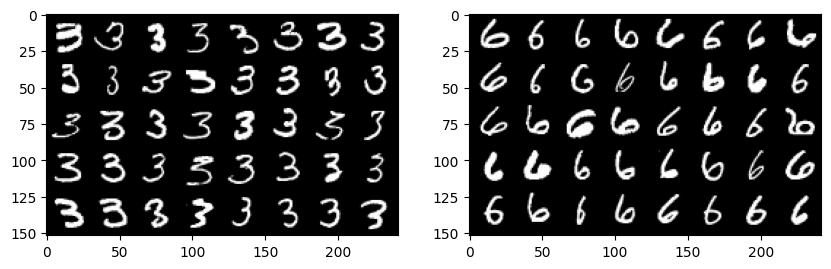

In [15]:
neighbor_id = 1
query = node.query_tasks[neighbor_id]
fig, ax = plt.subplots(1, len(query.keys()), figsize=(10, 10))
for i, (y, data) in enumerate(query.items()):
    X = data['X'].cpu()
    print(data['scores'])
    ax[i].imshow(make_grid(X).permute(1, 2, 0));

In [16]:
from shell.fleet.mod.modmod import compute_consistency
compute_consistency(node.net, X.to('cuda'), task_id=0)

0.949999988079071

In [17]:
node.eval_test(4)

{0: 0.9940239043824701,
 1: 0.9713701431492843,
 2: 0.9410282258064516,
 3: 0.9732540861812778,
 4: 0.9646878198567042,
 'avg': 0.9688728358752376}

In [18]:
with torch.no_grad():
    node.net.eval()
    for i, (y, data) in enumerate(query.items()):
        X = data['X']
        for t in range(4):
            logits = node.net(X, t)
            print('t:', t, 'y:', y, '\nlogits', logits)
    

t: 0 y: 0 
logits tensor([[-0.1270,  0.3375],
        [ 0.0019,  0.1922],
        [ 0.4528, -0.3471],
        [ 0.3859, -0.2611],
        [ 0.3700, -0.2268],
        [-0.3108,  0.5073],
        [-0.3220,  0.5154],
        [-0.0327,  0.2249],
        [-0.3171,  0.4970],
        [ 0.1364,  0.0467],
        [ 0.2532, -0.1074],
        [-0.2338,  0.4299],
        [-0.2256,  0.4256],
        [-0.2295,  0.4302],
        [ 0.4540, -0.3492],
        [-0.3283,  0.5181],
        [ 0.3607, -0.2341],
        [ 0.1667,  0.0268],
        [ 0.1925, -0.0265],
        [ 0.2379, -0.0751],
        [ 0.3451, -0.2256],
        [-0.2676,  0.4624],
        [-0.1349,  0.3405],
        [ 0.2588, -0.1159],
        [ 0.0386,  0.1511],
        [-0.2877,  0.4866],
        [-0.0374,  0.2361],
        [ 0.4881, -0.3871],
        [-0.0077,  0.2078],
        [-0.0478,  0.2401],
        [-0.1271,  0.3276],
        [ 0.2748, -0.1256],
        [ 0.4097, -0.2952],
        [-0.2266,  0.4363],
        [ 0.4592, -0.3586],
  

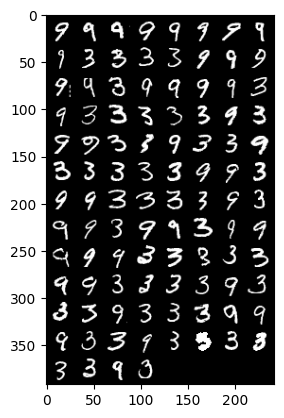

In [19]:
node = fleet.agents[5]
X = node.dataset.valset[3].tensors[0]
# X = node.dataset.valset[6].tensors[0]
plt.imshow(make_grid(X).permute(1, 2, 0));

In [20]:
print(fleet.agents[0].dataset.class_sequence)
print(fleet.agents[1].dataset.class_sequence)

[7 0 8 4 8 3 3 9 8 0 1 0 5 9 6 4 9 0 3 0]
[7 0 8 4 8 3 3 9 5 0 3 6 2 7 6 7 6 1 0 5]


In [21]:
task_id = 3
task = node.dataset.class_sequence[task_id *
                                                 node.dataset.num_classes_per_task: (task_id + 1) * node.dataset.num_classes_per_task]
task

array([3, 9])

In [22]:
node.dataset.class_sequence

array([7, 0, 8, 4, 8, 3, 3, 9, 4, 9, 3, 2, 2, 9, 6, 0, 5, 9, 7, 2])

In [23]:
node.incoming_modules

{0: [{'source_task_id': 4,
   'task_sim': -0.6894532714293865,
   'module_id': 4,
   'module': Linear(in_features=64, out_features=64, bias=True),
   'decoder': Linear(in_features=64, out_features=2, bias=True),
   'structure': Parameter containing:
   tensor([[1.4276, 0.6192, 0.6689, 1.1547],
           [0.5828, 1.4733, 1.3112, 0.7247],
           [0.5519, 0.5868, 0.6182, 0.8837],
           [0.6352, 0.5817, 1.4501, 0.6767],
           [1.2761, 1.1333, 0.9883, 1.1881]], device='cuda:0', requires_grad=True),
   'source_class_labels': array([8, 0])}],
 1: [{'source_task_id': 4,
   'task_sim': -0.6773588409801847,
   'module_id': 4,
   'module': Linear(in_features=64, out_features=64, bias=True),
   'decoder': Linear(in_features=64, out_features=2, bias=True),
   'structure': Parameter containing:
   tensor([[1.3494, 0.5704, 0.6945, 1.1386],
           [0.5231, 1.5190, 1.4145, 1.1459],
           [0.5226, 0.5402, 0.6877, 0.9180],
           [0.5133, 0.5949, 1.4957, 0.6256],
           [1

In [24]:
fleet.agents[1].query_tasks

{0: {0: {'X': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             ...,
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.]]],
   
   
           [[[0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             ...,
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.]]],
   
   
           [[[0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             ...,
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0.,  ..., 0., 0., 0.]]],
   
   
           ...,
   
   
           [[[0., 0., 0.,  ..., 0., 0., 0.],
             [0., 0., 0., 

In [25]:
import torch

In [26]:
dist = torch.tensor(
    [[1, 0.5, 0.2],
     [0.2, 0.01, -0.1]]
)

In [27]:
dist, _ = torch.topk(dist, 2, largest=False)

In [28]:
dist

tensor([[ 0.2000,  0.5000],
        [-0.1000,  0.0100]])

In [29]:
from torchmetrics.functional.pairwise import pairwise_cosine_similarity

In [30]:
x = torch.tensor([[2, 3], [3, 5], [5, 8]], dtype=torch.float32)

In [31]:
pairwise_cosine_similarity(x, x)

tensor([[1.0000, 0.9989, 0.9996],
        [0.9989, 1.0000, 0.9998],
        [0.9996, 0.9998, 1.0000]])